Dataset link
https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

## **EDA**

data cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np         # linear algebra
import pandas as pd        # data processing, CSV file I/O (e.g. pd.read_csv)


data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv', index_col=False)

In [ ]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
# Id column is redundant and not useful, we want to drop it
data.drop('id', axis =1, inplace=True)
#data.drop('Unnamed: 0', axis=1, inplace=True)
data.head(2)
data.shape

(569, 31)

In [ ]:
# Review data types with "info()".
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
#check for missing variables
data.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [ ]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
#save the cleaner version of dataframe for future analyis
data.to_csv('/content/drive/MyDrive/Colab Notebooks/clean-data.csv')

Exploring the data

In [ ]:
# %matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm
import seaborn as sns # visualization


plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['axes.titlesize'] = 'large'

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data.skew()

<ipython-input-14-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

In [ ]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
diag_gr = data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['No. of observations'])

,No. of observations
diagnosis,
B,357
M,212


modeling

<ipython-input-22-55b93152be49>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['diagnosis'],label='Count',palette="Set3")


<Axes: xlabel='count', ylabel='diagnosis'>

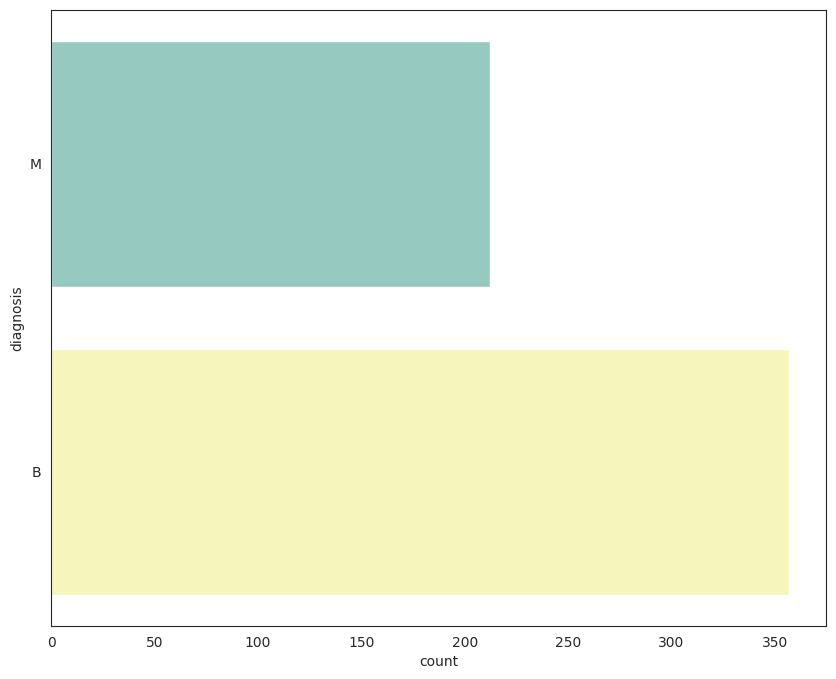

In [ ]:
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(data['diagnosis'],label='Count',palette="Set3")

In [ ]:
#Break up columns into groups, according to their suffix designation
#(_mean, _se,
# and __worst) to perform visualisation plots off.
#Join the 'ID' and 'Diagnosis' back on
# data_id_diag=data.loc[:,["id","diagnosis"]]
data_diag=data.loc[:,["diagnosis"]]

#For a merge + slice:
data_mean = data.iloc[:, 1:11]  # Select columns from index 1 to 10
data_se = data.iloc[:, 11:22]   # Select columns from index 11 to 21
data_worst = data.iloc[:, 23:]  # Select columns from index 23 onwards

# print(df_id_diag.columns)
#print(data_mean.columns)

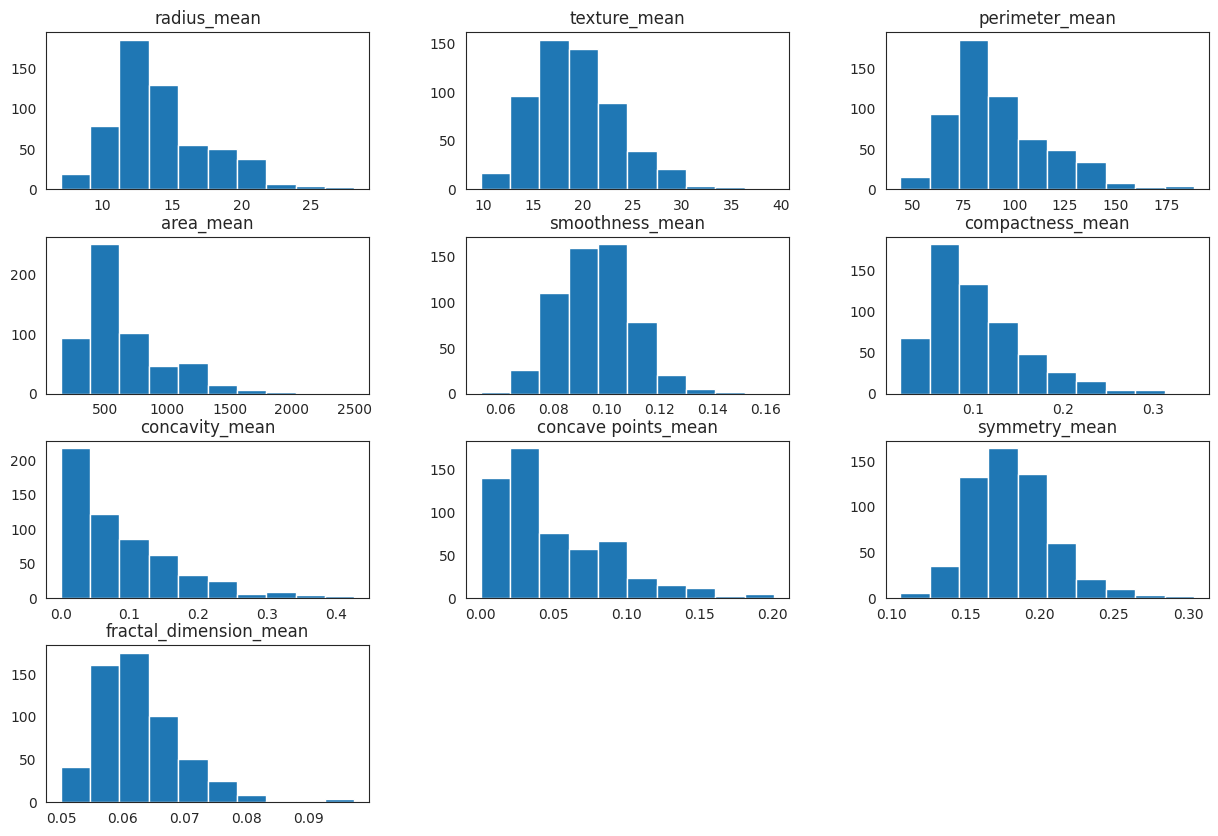

In [ ]:
#Plot histograms of CUT1 variables
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)


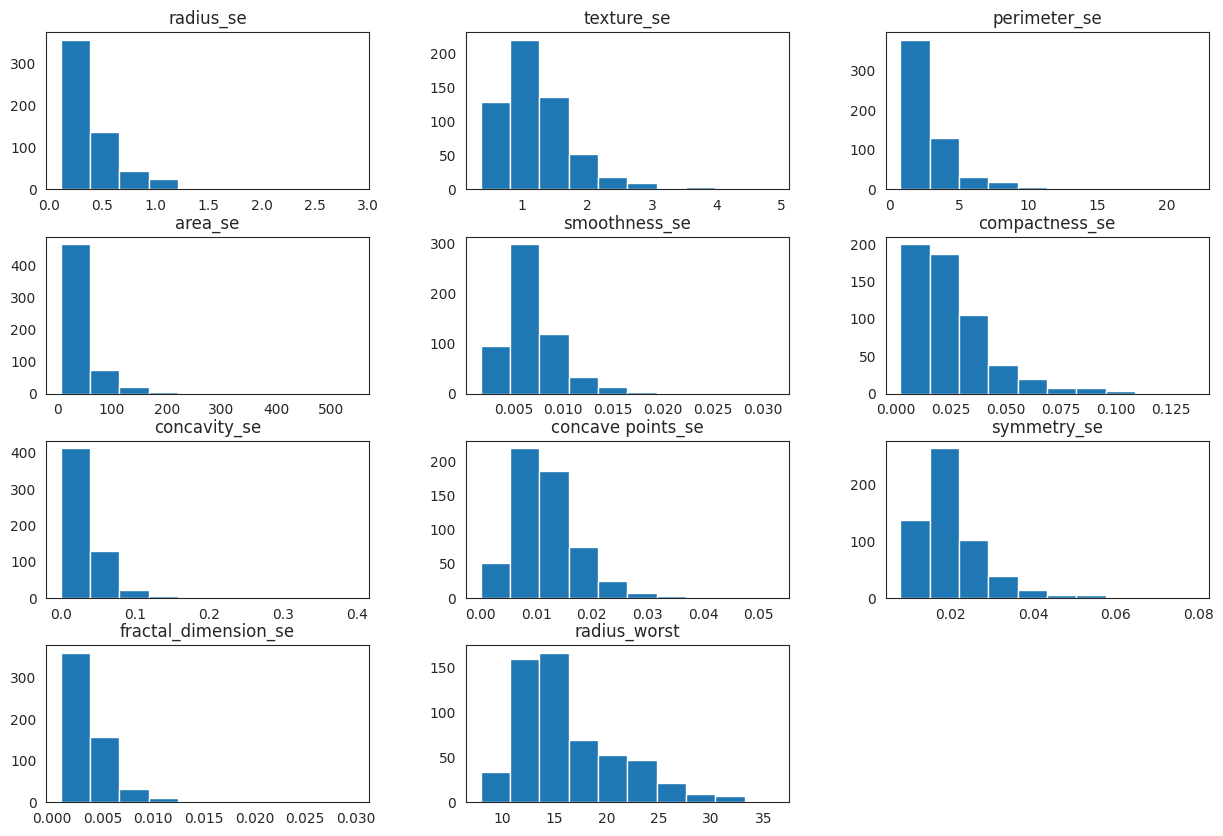

In [ ]:
#Plot histograms of _se variables
hist_se=data_se.hist(bins=10, figsize=(15, 10),grid=False,)

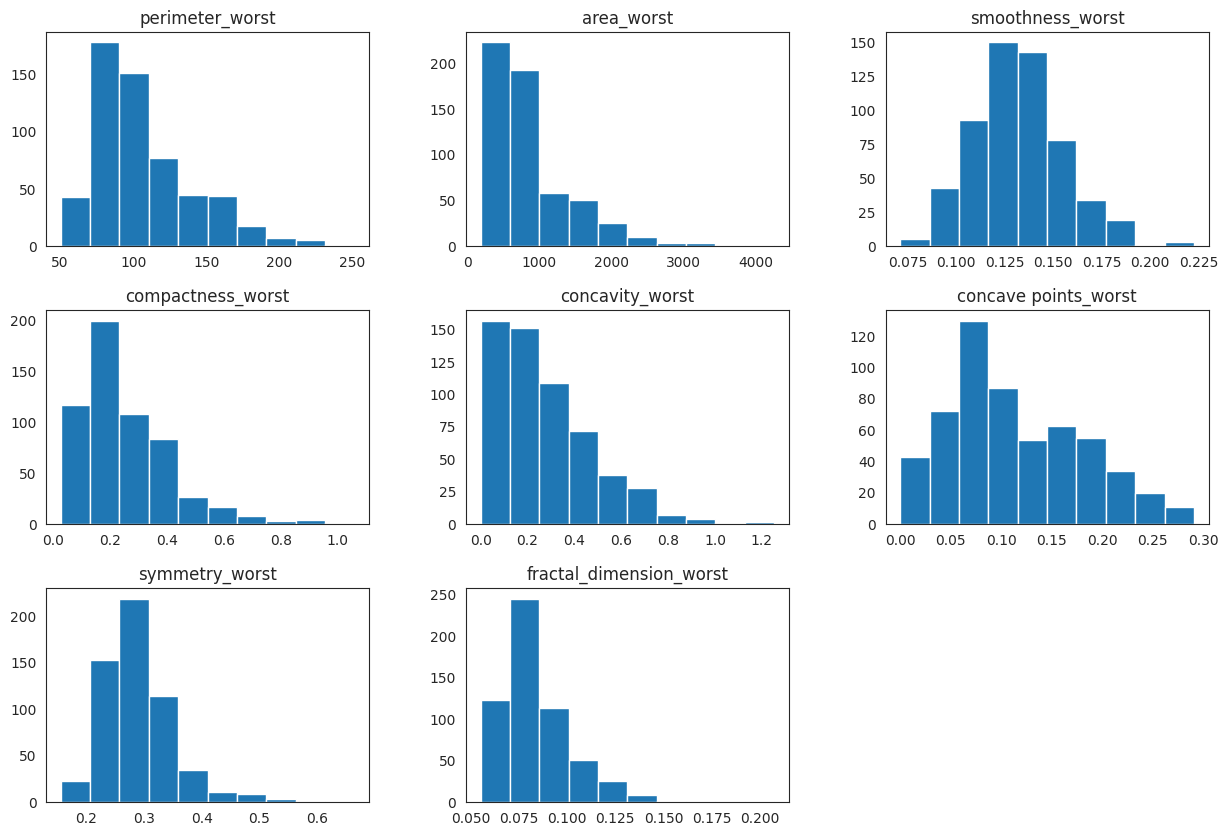

In [ ]:
#Plot histograms of _worst variables
hist_worst=data_worst.hist(bins=10, figsize=(15, 10),grid=False,)

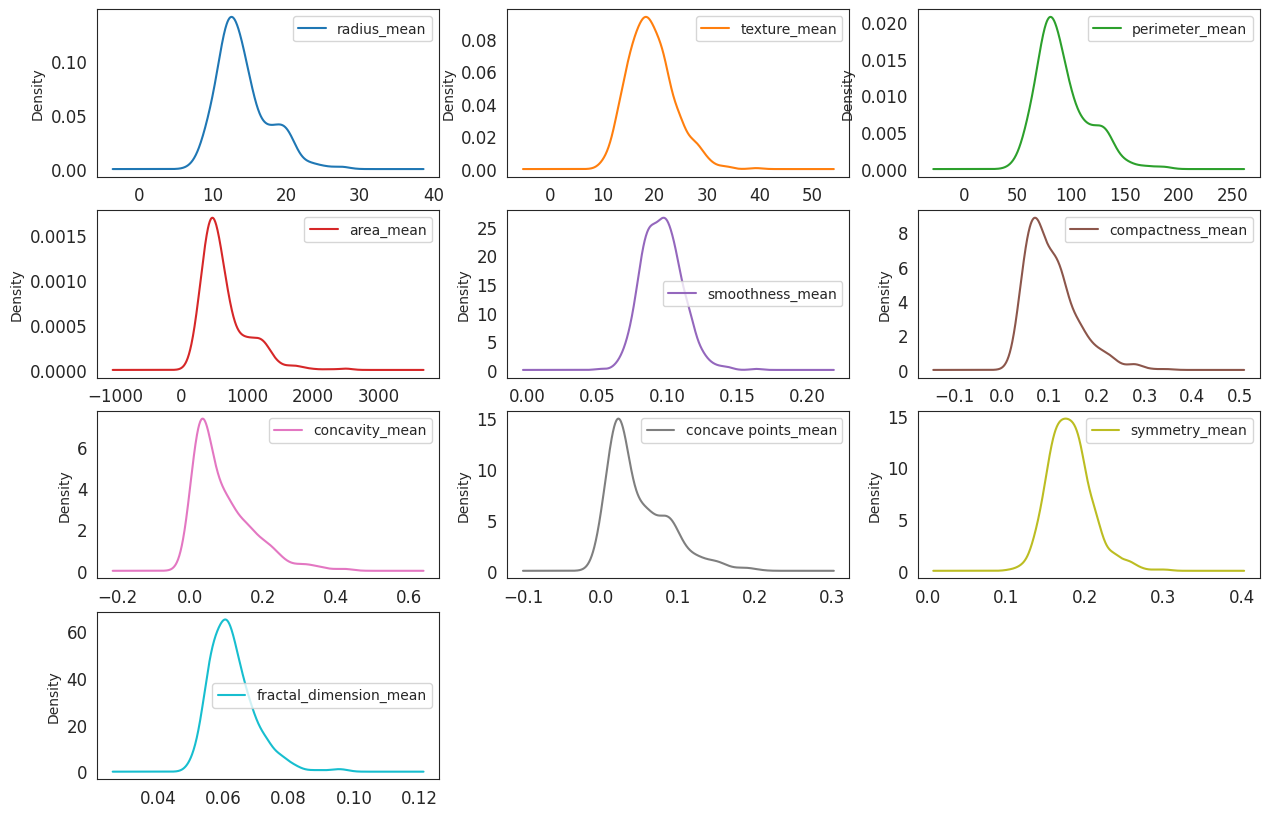

In [ ]:
#Density Plots
plt = data_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,
                     sharey=False,fontsize=12, figsize=(15,10))

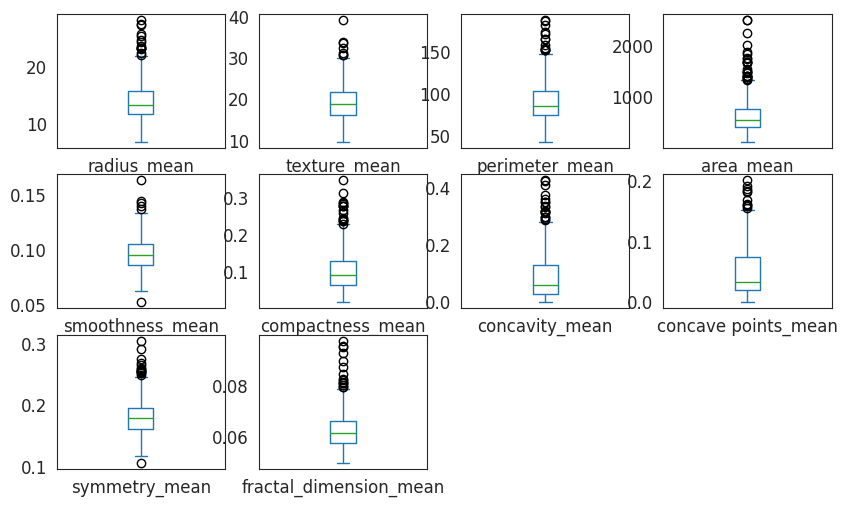

In [ ]:
# box and whisker plots
plt=data_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)

coorelation matrix

<Axes: title={'center': 'Breast Cancer Feature Correlation'}>

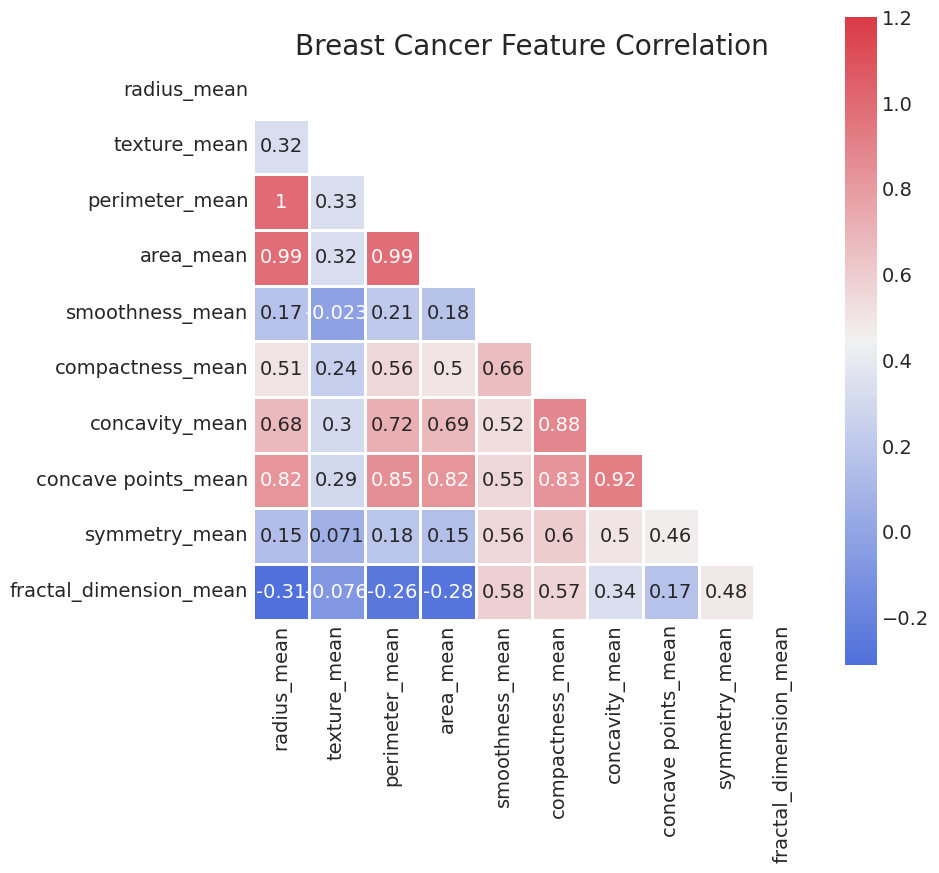

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
# Compute the correlation matrix
corr = data_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
data, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask,
            ax=ax,annot=True, fmt='.2g',linewidths=2)

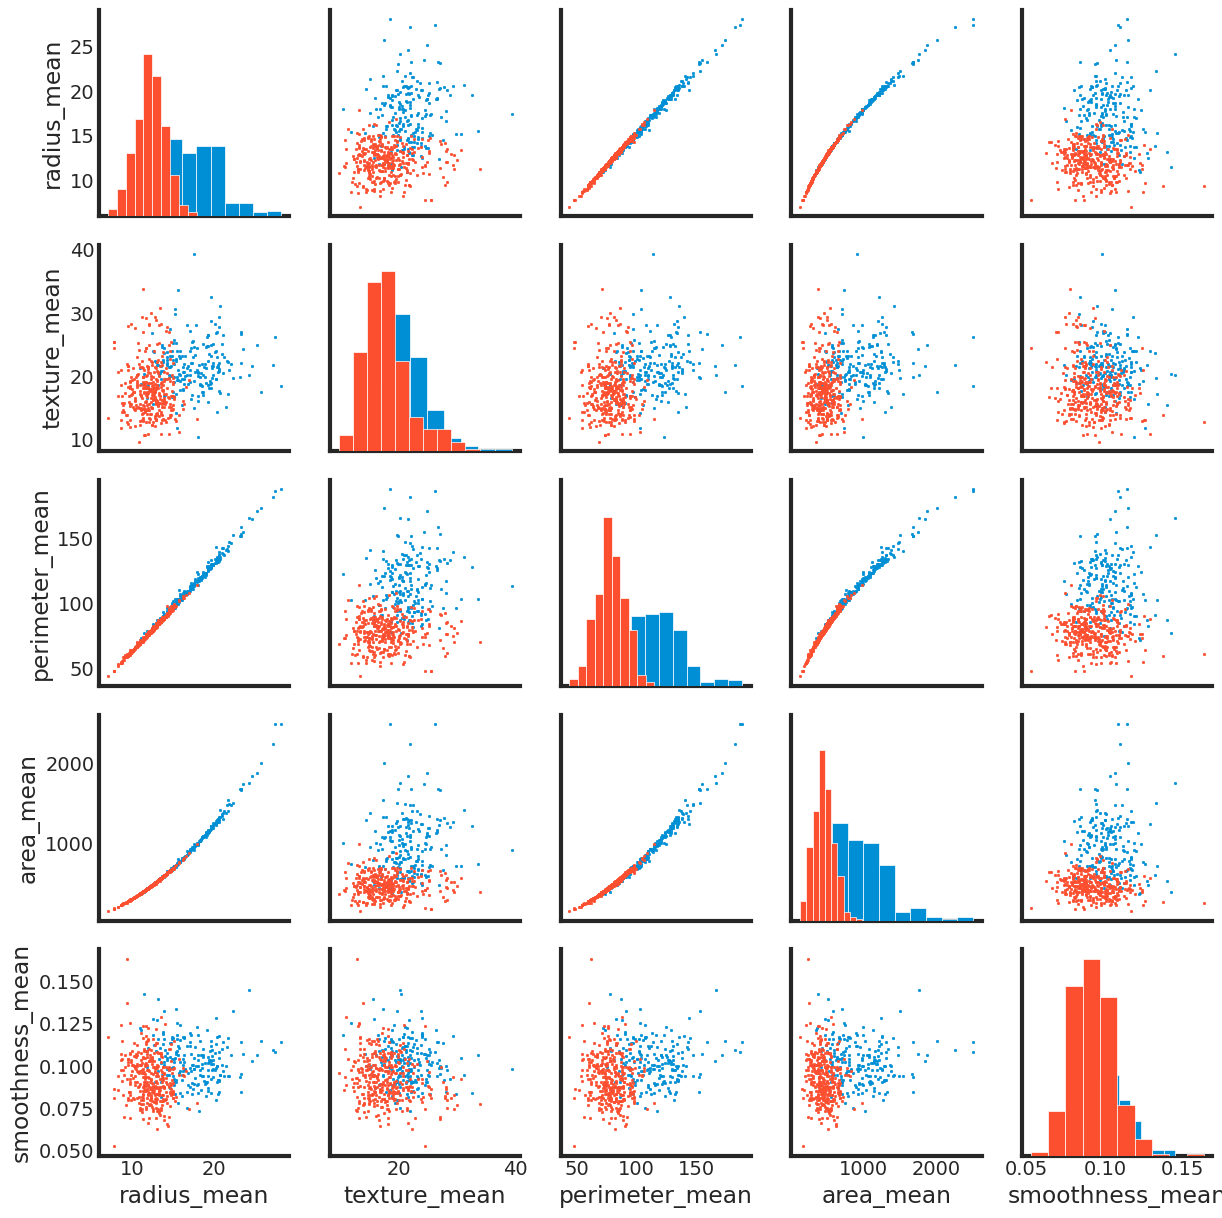

In [ ]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/clean-data.csv', index_col=False)
g = sns.PairGrid(data[[data.columns[1],data.columns[2],data.columns[3],
                     data.columns[4], data.columns[5],data.columns[6]]],hue='diagnosis' )
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

DATA PREPROCESSING

In [ ]:
# import matplotlib.pyplot as plt

#Load libraries for data processing
# import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
# import numpy as np
from scipy.stats import norm

# visualization
# import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style("white")

# plt.rcParams['figure.figsize'] = (8,4)
#plt.rcParams['axes.titlesize'] = 'large'

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Assign predictors to a variable of ndarray (matrix) type
array = data.values
X = array[:,1:31]
y = array[:,0]

In [ ]:
#transform the class labels from their original string representation (M and B) into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [ ]:
from sklearn.model_selection import train_test_split

#Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)


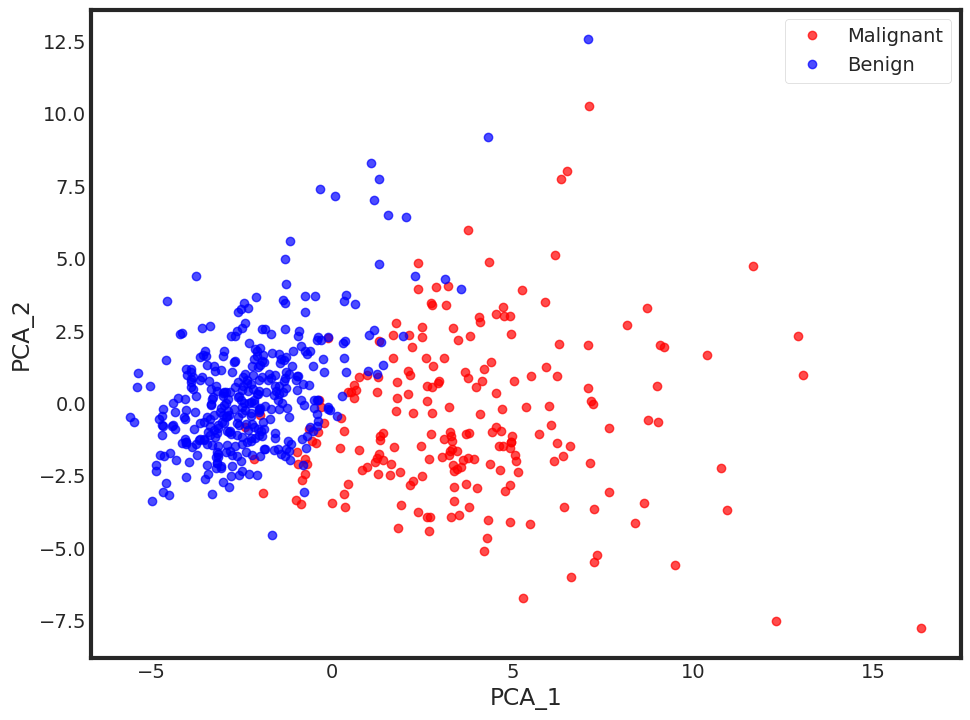

In [ ]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][data.diagnosis == 'M'],PCA_df['PCA_2'][data.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][data.diagnosis == 'B'],PCA_df['PCA_2'][data.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

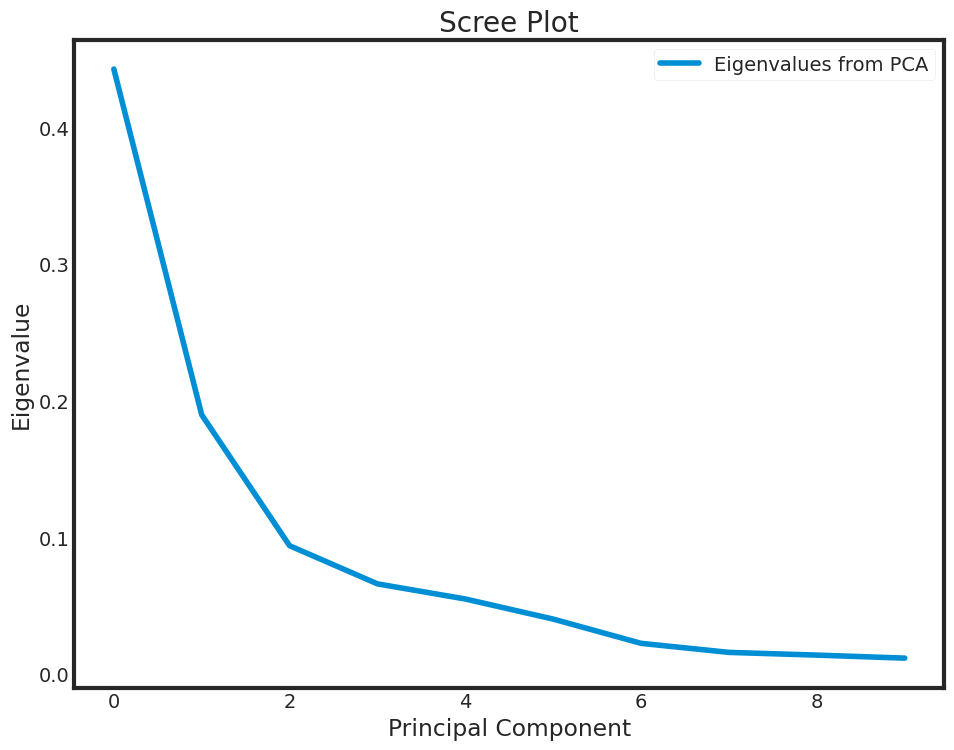

In [ ]:
var= pca.explained_variance_ratio_
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)

plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

# **general functions for models**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv', index_col=False)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [ ]:
def report(pred, actual):
    accuracy = round(accuracy_score(pred, actual), 4)
    precision = round(precision_score(pred, actual), 4)
    recall = round(recall_score(pred, actual), 4)
    f1 = round(f1_score(pred, actual), 4)

    print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nf1_score: {f1}')

In [ ]:
def auc_curve(model):
    y_pred_proba_train = model.predict_proba(X_train)[:, 1]
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]

    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)

    auc_train = round(roc_auc_score(y_train, y_pred_proba_train), 4)
    auc_test = round(roc_auc_score(y_test, y_pred_proba_test), 4)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.plot (fpr_train, tpr_train, label=(f'AUC train = {auc_train}'), color='tomato')
    plt.plot (fpr_test, tpr_test, label=(f'AUC test = {auc_test}'), color='olive')
    plt.ylabel('True positive')
    plt.xlabel('False positive')

    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# **KNN MODEL**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv', index_col=False)
k = data.copy()

In [ ]:
k['diagnosis'] = k['diagnosis'].replace({'M': 1.0, 'B': 0.0})
k.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = k.drop(['diagnosis'], axis=1)
y = k['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 31), (114, 31), (455,), (114,))

In [ ]:
k['diagnosis'].unique()

array([1., 0.])

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

print("Train quality:")
report(y_train_knn, y_train)
print("\nTest quality:")
report(y_test_knn, y_test)

Train quality:
Accuracy: 0.9824
Precision: 0.9527
Recall: 1.0
f1_score: 0.9758

Test quality:
Accuracy: 0.9474
Precision: 0.9302
Recall: 0.9302
f1_score: 0.9302


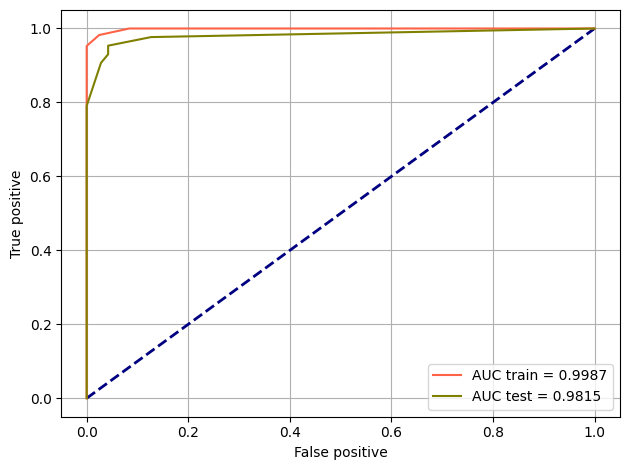

In [ ]:
auc_curve(knn)

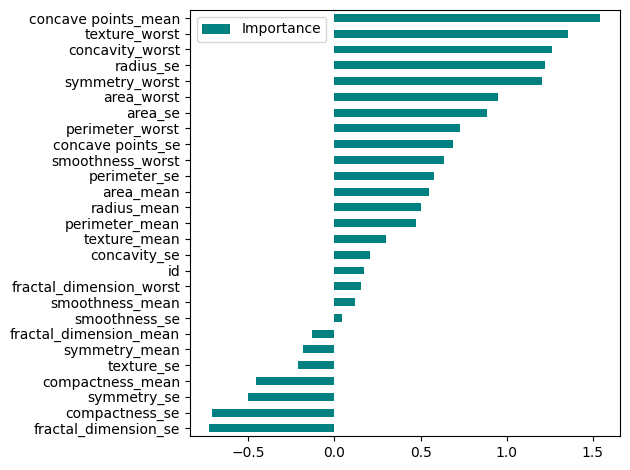

In [13]:
feature = l.drop(['diagnosis'], axis=1).columns
importance = log.coef_[0]
f_i = pd.DataFrame(index=feature,
                   data={'Importance': importance})
f_i.sort_values(['Importance'], inplace=True)

f_i.plot.barh(color=['teal'])

plt.tight_layout()
plt.show()

# **Logistic Regression Model**

In [8]:
l = data.copy()
l.drop(['compactness_worst', 'concave points_worst', 'radius_worst', 'concavity_mean'], axis=1, inplace=True)

In [9]:
l['diagnosis'] = l['diagnosis'].replace({'M': 1.0, 'B': 0.0})
l.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,area_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,842302,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.14710,0.2419,...,0.01587,0.03003,0.006193,17.33,184.60,2019.0,0.1622,0.7119,0.4601,0.11890
1,842517,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.07017,0.1812,...,0.01340,0.01389,0.003532,23.41,158.80,1956.0,0.1238,0.2416,0.2750,0.08902
2,84300903,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.12790,0.2069,...,0.02058,0.02250,0.004571,25.53,152.50,1709.0,0.1444,0.4504,0.3613,0.08758
3,84348301,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.10520,0.2597,...,0.01867,0.05963,0.009208,26.50,98.87,567.7,0.2098,0.6869,0.6638,0.17300
4,84358402,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.10430,0.1809,...,0.01885,0.01756,0.005115,16.67,152.20,1575.0,0.1374,0.4000,0.2364,0.07678


In [10]:
X = l.drop(['diagnosis'], axis=1)
y = l['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 27), (171, 27), (398,), (171,))

In [11]:
log = LogisticRegression(random_state=42)
log.fit(X_train, y_train)

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

print("Train quality:")
report(y_train_log, y_train)
print("\nTest quality:")
report(y_test_log, y_test)

Train quality:
Accuracy: 0.9874
Precision: 0.9732
Recall: 0.9932
f1_score: 0.9831

Test quality:
Accuracy: 0.9883
Precision: 0.9841
Recall: 0.9841
f1_score: 0.9841


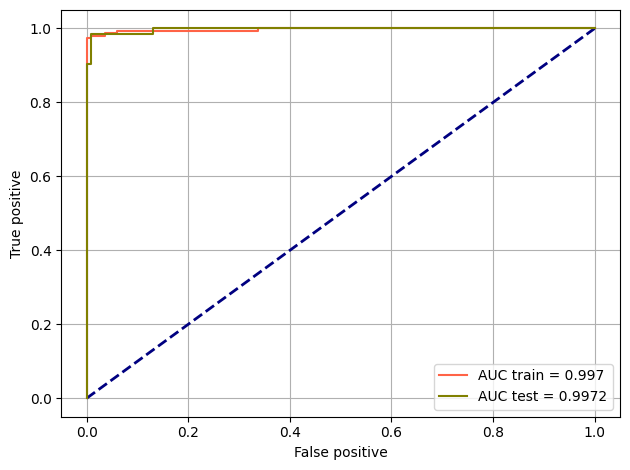

In [12]:
auc_curve(log)

# **Decision Tree**

In [15]:
t = data.copy()
t['diagnosis'] = t['diagnosis'].replace({'M': 1.0, 'B': 0.0})
t.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
X = t.drop(['diagnosis'], axis=1)
y = t['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 31), (171, 31), (398,), (171,))

In [17]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

print(classification_report(y_true=y_test, y_pred=y_test_tree))

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       108
         1.0       0.88      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



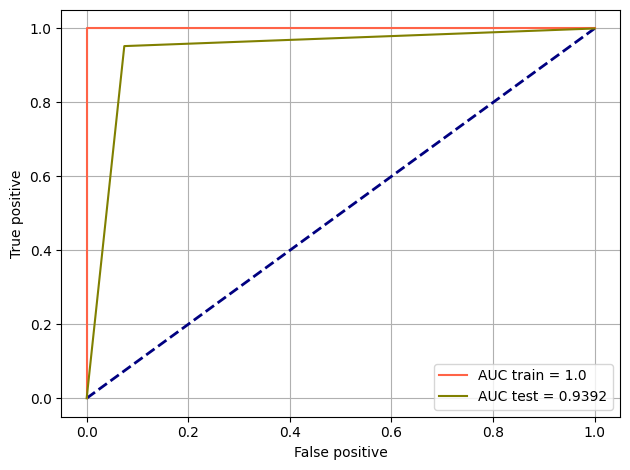

In [19]:
auc_curve(tree)

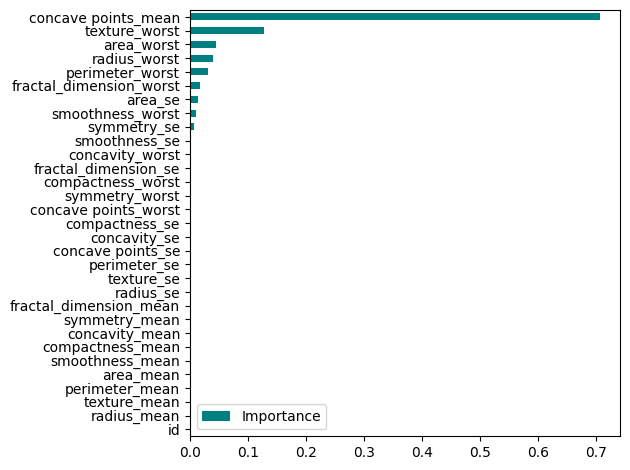

In [18]:
feature = t.drop(['diagnosis'], axis=1).columns
importance = tree.feature_importances_
f_i = pd.DataFrame(index=feature,
                   data={'Importance': importance})
f_i.sort_values(['Importance'], inplace=True)

f_i.plot.barh(color=['teal'])

plt.tight_layout()
plt.show()


# **XGBoost Model**

In [21]:
b = data.copy()
b['diagnosis'] = b['diagnosis'].replace({'M': 1.0, 'B': 0.0})
b.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
X = b.drop(['diagnosis'], axis=1)
y = b['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 31), (171, 31), (398,), (171,))

In [23]:
xgb = xgb.XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

print(classification_report(y_true=y_test, y_pred=y_test_xgb))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       108
         1.0       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



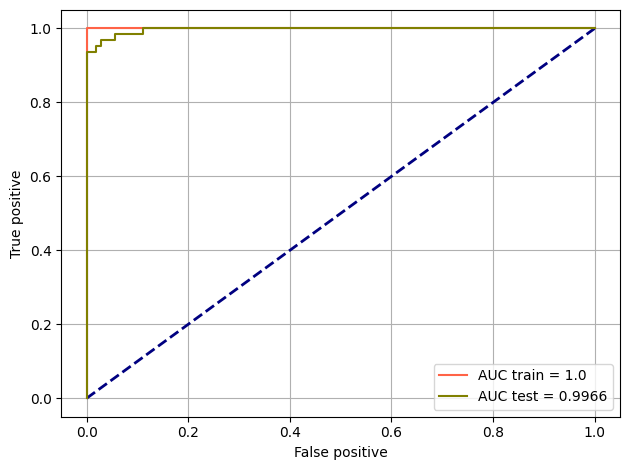

In [25]:
auc_curve(xgb)

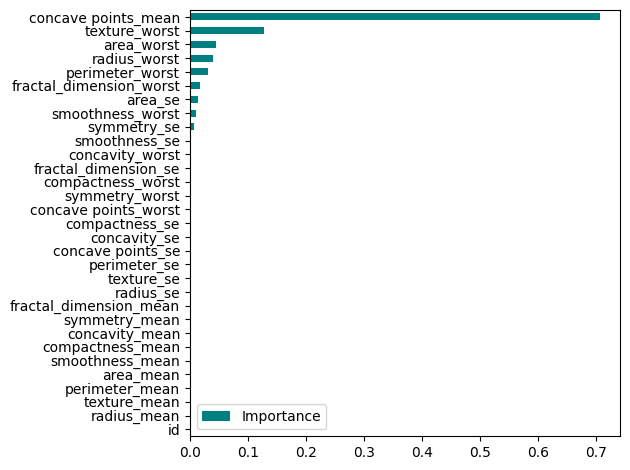

In [26]:
feature = b.drop(['diagnosis'], axis=1).columns
importance = tree.feature_importances_
f_i = pd.DataFrame(index=feature,
                   data={'Importance': importance})
f_i.sort_values(['Importance'], inplace=True)

f_i.plot.barh(color=['teal'])

plt.tight_layout()
plt.show()
